In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=100
CHANNELS=3
EPOCHS=10

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Fish_Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 9000 files belonging to 9 classes.


In [4]:
class_names=dataset.class_names
class_names

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [5]:
len(dataset)

90

(100, 256, 256, 3)
[6 1 1 3 8 6 8 8 1 4 4 4 8 4 1 4 3 7 7 6 6 3 5 5 0 5 2 1 3 1 2 1 6 2 2 7 5
 3 0 6 4 1 2 4 2 5 0 0 5 7 5 0 3 0 5 8 4 0 0 8 3 6 5 6 0 1 6 1 6 5 5 8 3 0
 8 2 8 8 1 5 2 2 2 1 6 5 4 8 4 5 0 3 6 2 3 4 0 1 1 5]


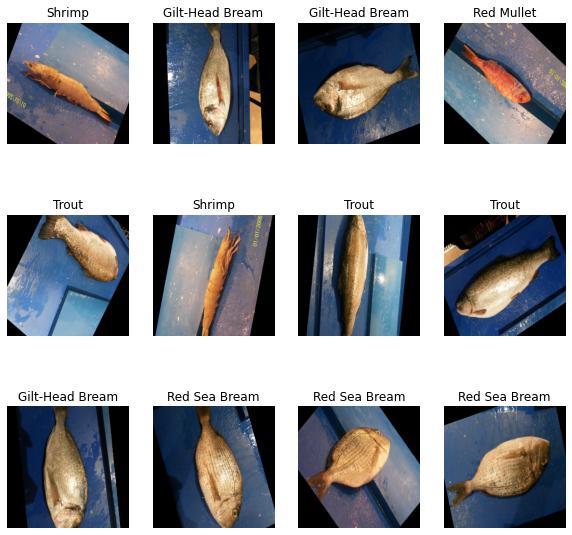

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
train_size=0.8
len(dataset)*train_size

72.0

In [8]:
train_ds=dataset.take(72)

len(train_ds)

72

In [9]:
val_size=0.1
len(dataset)*val_size

9.0

In [10]:
test_ds=dataset.skip(72)

In [11]:
len(test_ds)

18

In [12]:
val_ds=test_ds.take(9)
len(val_ds)

9

In [13]:
test_ds=test_ds.skip(9)
len(test_ds)

9

In [14]:
def get_dataset_partitons_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)
    train_ds=dataset.take(train_size)
    test_ds=dataset.skip(train_size)
    val_ds=test_ds.take(val_size)
    test_ds=test_ds.skip(val_size)
    return train_ds,val_ds,test_ds

In [15]:
train_ds,val_ds,test_ds=get_dataset_partitons_tf(dataset)

In [16]:
len(train_ds)

72

In [17]:
len(val_ds)

9

In [18]:
len(test_ds)

9

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=9
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (100, 256, 256, 3)        0         
                                                                 
 conv2d (Conv2D)             (100, 254, 254, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (100, 127, 127, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (100, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (100, 62, 62, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (100, 60, 60, 64)        

In [23]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds  
)

Epoch 1/10
72/72 [==============================] - 734s 10s/step - loss: 2.0438 - accuracy: 0.2029 - val_loss: 1.7578 - val_accuracy: 0.3211
Epoch 2/10
72/72 [==============================] - 670s 9s/step - loss: 1.2987 - accuracy: 0.5151 - val_loss: 0.9018 - val_accuracy: 0.6644
Epoch 3/10
72/72 [==============================] - 675s 9s/step - loss: 0.7158 - accuracy: 0.7349 - val_loss: 0.5438 - val_accuracy: 0.8044
Epoch 4/10
72/72 [==============================] - 677s 9s/step - loss: 0.4149 - accuracy: 0.8490 - val_loss: 0.4515 - val_accuracy: 0.8367
Epoch 5/10
72/72 [==============================] - 651s 9s/step - loss: 0.3184 - accuracy: 0.8863 - val_loss: 0.3026 - val_accuracy: 0.8822
Epoch 6/10
72/72 [==============================] - 653s 9s/step - loss: 0.2289 - accuracy: 0.9157 - val_loss: 0.1910 - val_accuracy: 0.9300
Epoch 7/10
72/72 [==============================] - 344s 5s/step - loss: 0.1481 - accuracy: 0.9475 - val_loss: 0.1274 - val_accuracy: 0.9533
Epoch 8/10
7

In [25]:
scores=model.evaluate(test_ds)

9/9 [==============================] - 22s 703ms/step - loss: 0.1504 - accuracy: 0.9500


In [26]:
scores

[0.15035030245780945, 0.949999988079071]

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 72}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Train and Validation')

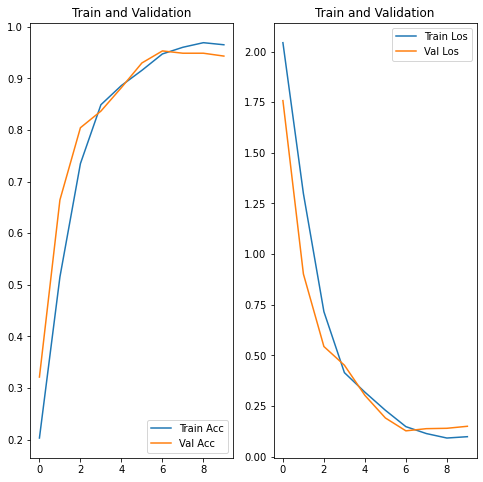

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Train Acc')
plt.plot(range(EPOCHS),val_acc,label='Val Acc')
plt.legend(loc='lower right')
plt.title('Train and Validation')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Train Los')
plt.plot(range(EPOCHS),val_loss,label='Val Los')
plt.legend(loc='upper right')
plt.title('Train and Validation')

In [96]:
model.save("trainedModel.h5")

In [97]:
num = [0,1,2,3,4,5,6,7,8]
dic = dict(zip(class_names,num))
dic

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [98]:
li = list(dic.keys())
print(li)

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


In [105]:
from tensorflow.keras.preprocessing import image
import numpy as np
class pridict:
    def __init__(self , path):
        image_path=path
        new_img = image.load_img(image_path)
        img = image.img_to_array(new_img)
        img = np.expand_dims(img, axis=0)

        print("Following is our prediction:")
        prediction = model.predict(img)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        d = prediction.flatten()
        j = d.max()
        for index,item in enumerate(d):
            if item == j:
                class_name = li[index]

        ##Another way
        # img_class = classifier.predict_classes(img)
        # img_prob = classifier.predict_proba(img)
        # print(img_class ,img_prob )


        #ploting image with predicted class name        
        plt.figure(figsize = (4,4))
        plt.imshow(new_img)
        plt.axis('off')
        plt.title(class_name)
        plt.show()

Following is our prediction:
1/1 [==============================] - 0s 178ms/step


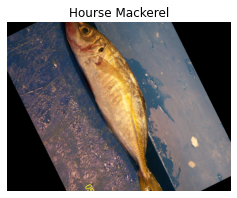

In [106]:
pridict("C:/Users/JAYCHANDRA/Desktop/Mini project/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00001.png")

Following is our prediction:
1/1 [==============================] - 0s 32ms/step


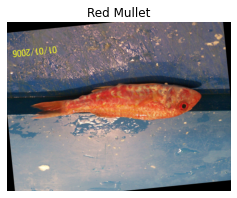

In [107]:
pridict("C:/Users/JAYCHANDRA/Desktop/Mini project/Fish_Dataset/Red Mullet/Red Mullet/00003.png")

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
actual_label Striped Red Mullet
4/4 [==============================] - 4s 519ms/step
predicted label Striped Red Mullet


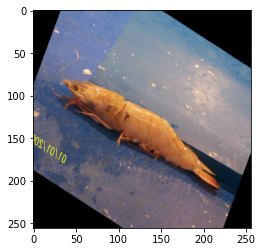

In [108]:
import numpy as np
print(class_names)
for images_batch,labels_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print('actual_label',class_names[first_label])
    
    batch_pred=model.predict(images_batch)
    print('predicted label',class_names[np.argmax(batch_pred[0])])

In [109]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 29ms/step


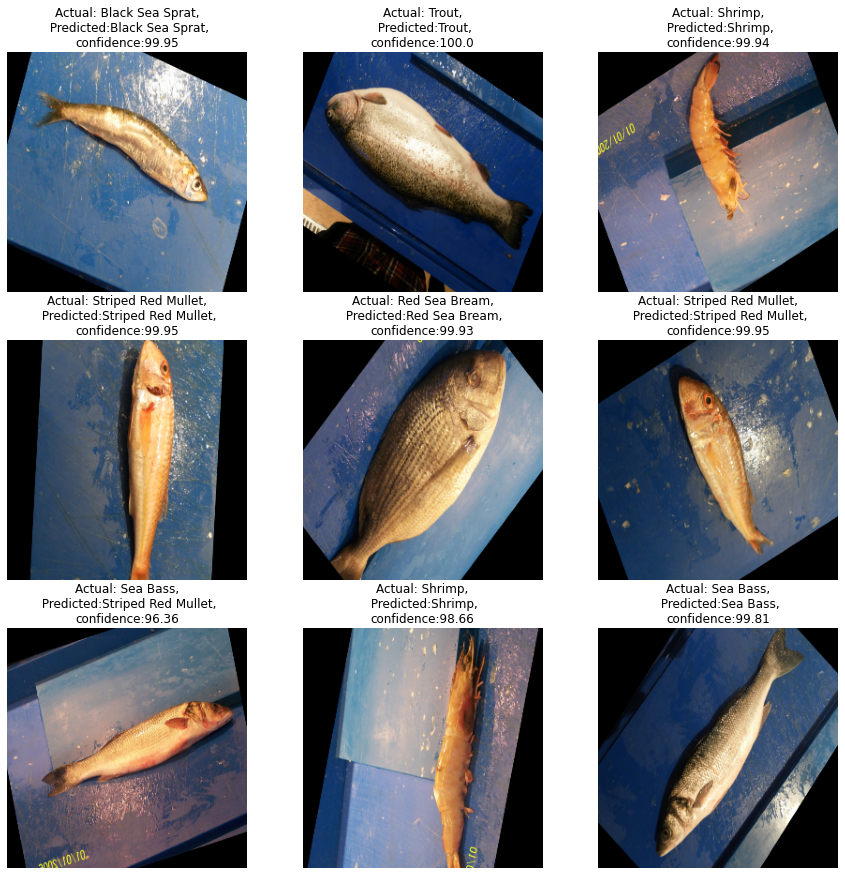

In [110]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\nconfidence:{confidence}")
        
        plt.axis('off')